In [29]:
#Primero importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from tqdm import tqdm

In [30]:
#Primero leemos todos los archivos txt
array_reposo = np.genfromtxt("Reposo_EKG.txt",delimiter="	",skip_header = 2)
array_respiracion=np.genfromtxt("/content/Respiración_EKG.txt",delimiter="	",skip_header = 2)
array_ejercicio=np.genfromtxt("/content/Ejercicio_EKG.txt",delimiter="	",skip_header = 2)

#Guardamos los valores de cada caso a un tipo de array
valores_reposo=array_reposo[:,-2]
valores_respiracion=array_respiracion[:,-2]
valores_ejercicio=array_ejercicio[:,-2]

#Determinamos la longitud de cada arreglo
cantidad_reposo=np.size(valores_reposo);
cantidad_respiracion=np.size(valores_respiracion);
cantidad_ejercicio=np.size(valores_ejercicio);

#Siendo la frecuencia de muestreo del BITalino de 1000 Hz
Fs=1000 #Hz
#Creamos los vectores de tiempo para cada caso
tiempo_reposo=np.arange(0,cantidad_reposo)
tiempo_reposo=tiempo_reposo/1000

tiempo_respiracion=np.arange(0,cantidad_respiracion)
tiempo_respiracion=tiempo_respiracion/1000

tiempo_ejercicio=np.arange(0,cantidad_ejercicio)
tiempo_ejercicio=tiempo_ejercicio/1000

#Convertimos los valores ADC a voltaje (mV)
valores_reposo=(((valores_reposo/1024)-0.5)*3.3)/(1100)
valores_reposo=valores_reposo*1000

valores_respiracion=(((valores_respiracion/1024)-0.5)*3.3)/(1100)
valores_respiracion=valores_respiracion*1000

valores_ejercicio=(((valores_ejercicio/1024)-0.5)*3.3)/(1100)
valores_ejercicio=valores_ejercicio*1000

(50.0, 55.0)

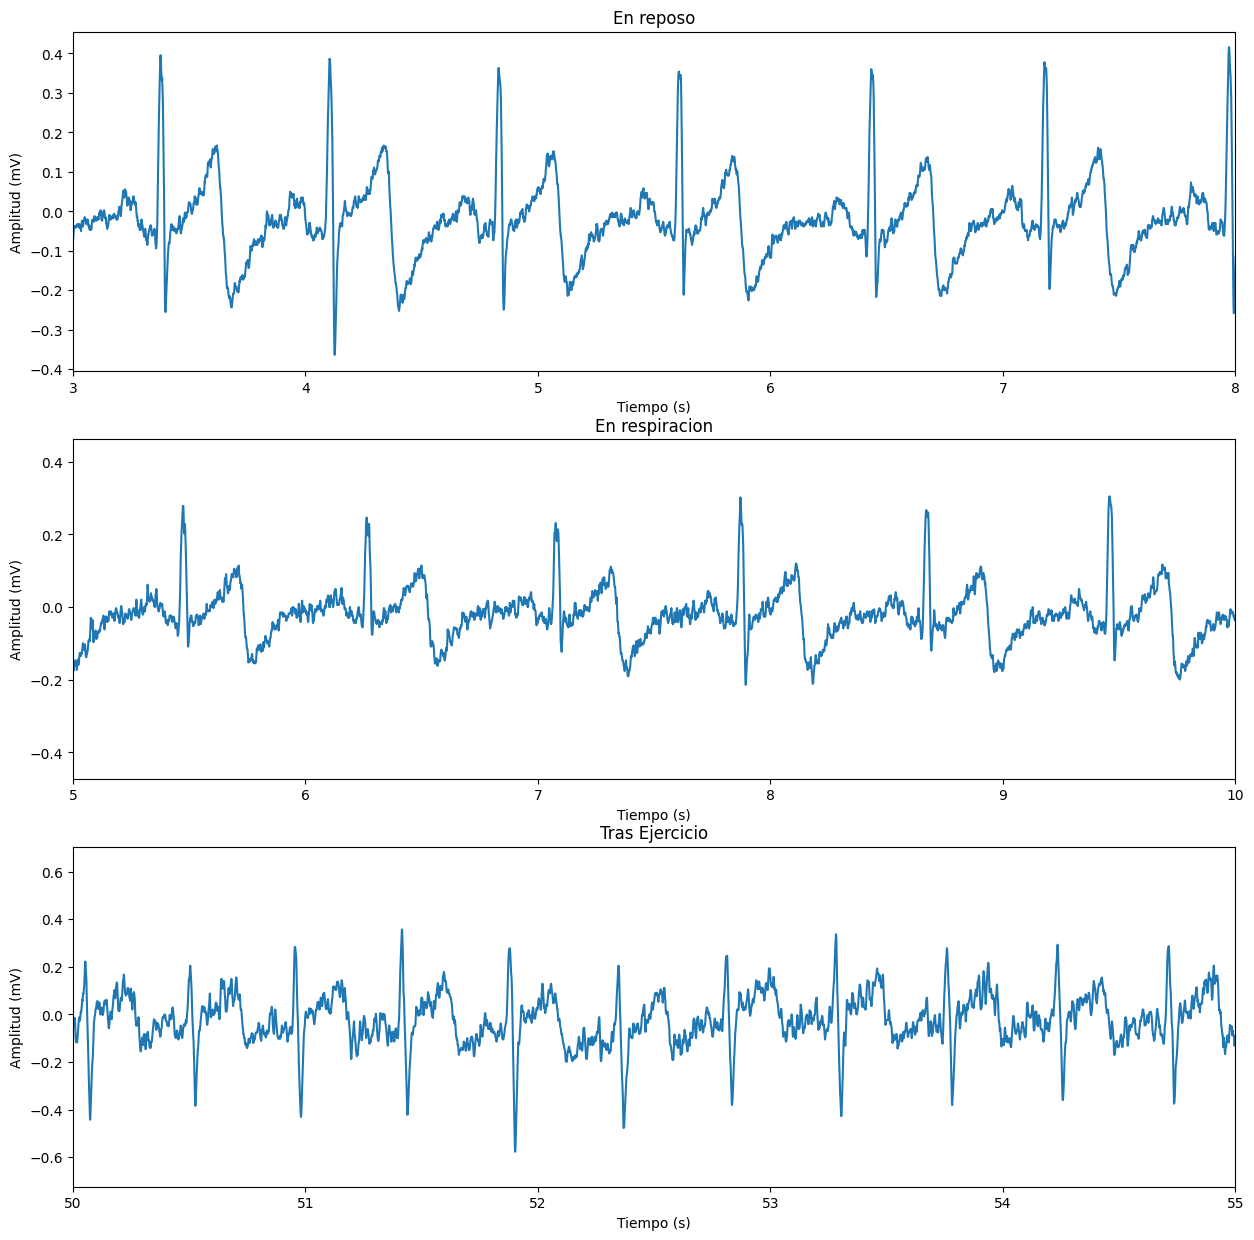

In [31]:
#Primero, mostramos todas las senales en crudo, es decir, sin filtrar
plt.figure(1,[15,15]);
plt.subplot(3,1,1);plt.plot(tiempo_reposo,valores_reposo);plt.xlabel('Tiempo (s)');plt.ylabel('Amplitud (mV)');plt.title('En reposo');plt.xlim([3,8])

plt.subplot(3,1,2);plt.plot(tiempo_respiracion,valores_respiracion);plt.xlabel('Tiempo (s)');plt.ylabel('Amplitud (mV)');plt.title('En respiracion');plt.xlim([5,10])
plt.subplot(3,1,3);plt.plot(tiempo_ejercicio,valores_ejercicio);plt.xlabel('Tiempo (s)');plt.ylabel('Amplitud (mV)');plt.title('Tras Ejercicio');plt.xlim([50,55])

(0.0, 200.0)

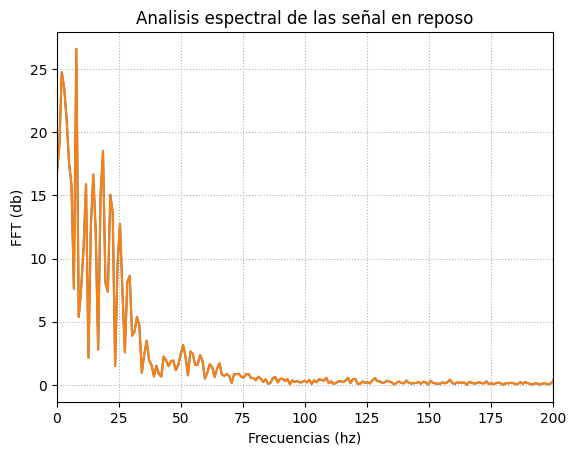

In [32]:
#Definicion de parametros iniciales

N = 1024
M = 210
n = np.arange(M)

Fs = 1000 #frecuencia de muestreo
Ts = 1/Fs # periodo de muestreo a 1ms


X_reposo = np.fft.fft(valores_reposo,N)
X_respiracion = np.fft.fft(valores_respiracion,N)
X_ejercicio = np.fft.fft(valores_ejercicio,N)

X_reposo = X_reposo[0:(N//2)]
X_respiracion = X_respiracion[0:(N//2)]
X_ejercicio = X_ejercicio[0:(N//2)]
#Calculando magnitudes
mag_reposo = np.abs(X_reposo)
mag_reposo = np.round(mag_reposo,3)

mag_respiracion = np.abs(X_respiracion)
mag_respiracion = np.round(mag_respiracion,3)

mag_ejercicio = np.abs(X_ejercicio)
mag_ejercicio = np.round(mag_ejercicio,3)

#frecuencias
F = np.linspace(0, Fs/2, N//2)

#eje de tiempo en seg
#t = n/Fs

plt.plot(F,mag_reposo)
plt.plot(F, mag_reposo)
plt.grid(linestyle=":")
plt.title("Analisis espectral de las señal en reposo")
plt.xlabel("Frecuencias (hz)")
plt.ylabel("FFT (db)")
plt.xlim([0,200])

(0.0, 200.0)

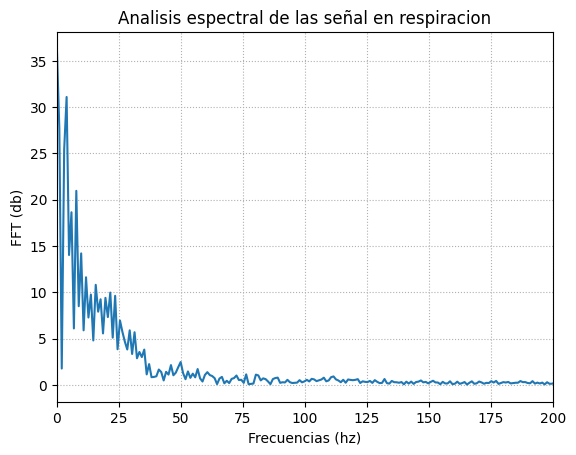

In [33]:
plt.plot(F,mag_respiracion)
plt.grid(linestyle=":")
plt.title("Analisis espectral de las señal en respiracion")
plt.xlabel("Frecuencias (hz)")
plt.ylabel("FFT (db)")
plt.xlim([0,200])

(0.0, 200.0)

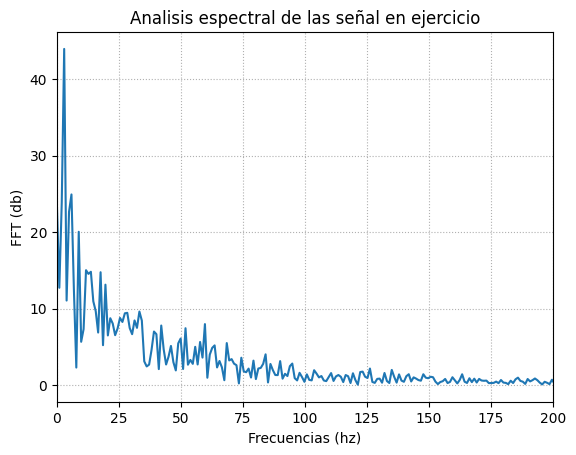

In [34]:
plt.plot(F,mag_ejercicio)
plt.grid(linestyle=":")
plt.title("Analisis espectral de las señal en ejercicio")
plt.xlabel("Frecuencias (hz)")
plt.ylabel("FFT (db)")
plt.xlim([0,200])

In [26]:
#Disenando el filtro del ECG
M=37
Fc=30
w = firwin(numtaps=M, cutoff=Fc, window='hamming', fs=1000)
w = np.round(w,3)

In [27]:
#Aplicando el filtro
y_reposo = lfilter(w, np.array(1),valores_reposo)
Y_reposo = np.fft.fft(y_reposo,N)
Y_reposo = np.round(Y_reposo[0:N//2],3)

y_respiracion = lfilter(w, np.array(1),valores_respiracion)
Y_respiracion = np.fft.fft(y_respiracion,N)
Y_respiracion = np.round(Y_respiracion[0:N//2],3)

y_ejercicio = lfilter(w, np.array(1),valores_ejercicio)
Y_ejercicio = np.fft.fft(y_ejercicio,N)
Y_ejercicio = np.round(Y_ejercicio[0:N//2],3)

(50.0, 55.0)

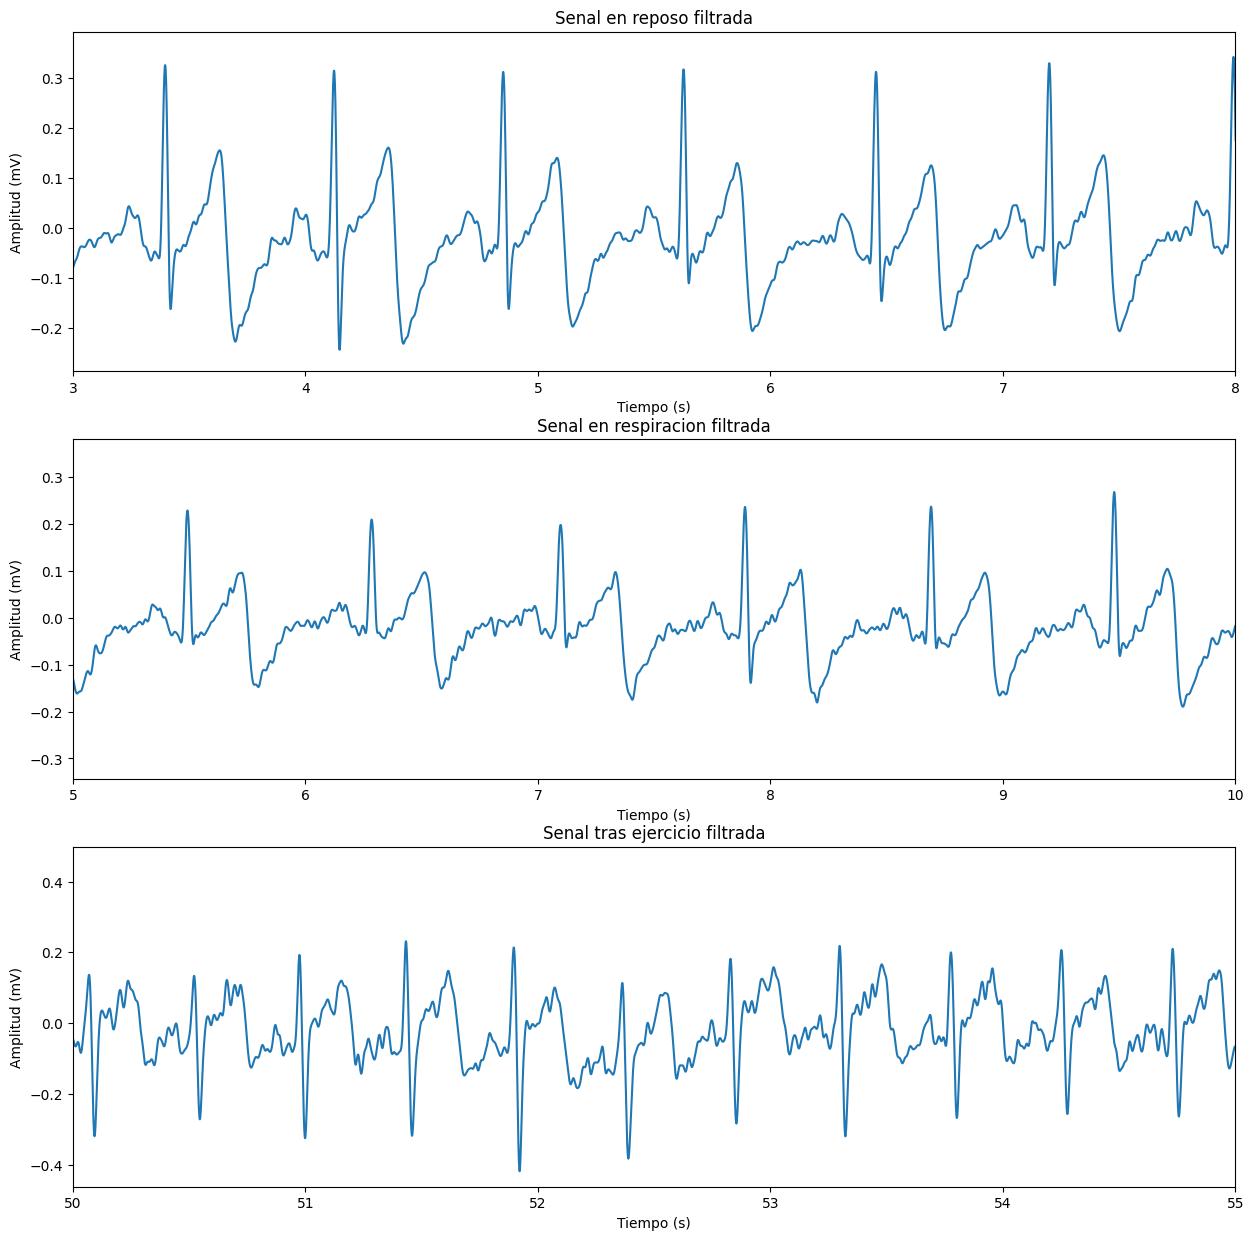

In [42]:
#Plotting
plt.figure(3,[15,15])
plt.subplot(3,1,1)

plt.plot(tiempo_reposo,y_reposo);plt.xlabel('Tiempo (s)');plt.ylabel('Amplitud (mV)');plt.title('Senal en reposo filtrada')
#plt.plot(tiempo_reposo,valores_reposo)
plt.xlim([3,8])
plt.subplot(3,1,2)
plt.plot(tiempo_respiracion,y_respiracion);plt.xlabel('Tiempo (s)');plt.ylabel('Amplitud (mV)');plt.title('Senal en respiracion filtrada')
#plt.plot(tiempo_reposo,valores_reposo)
plt.xlim([5,10])
plt.subplot(3,1,3)
plt.plot(tiempo_ejercicio,y_ejercicio);plt.xlabel('Tiempo (s)');plt.ylabel('Amplitud (mV)');plt.title('Senal tras ejercicio filtrada')
#plt.plot(tiempo_reposo,valores_reposo)
plt.xlim([50,55])